<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week6/Day5/W6D5_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: Advanced Statistical Analysis Of Apple Inc. Stock Data

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Data Loading and Exploration

In [ ]:
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')


In [ ]:
df.head(3)

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [ ]:
df['volume'] = df['volume'] / 1000000

In [ ]:
df.rename(columns={'volume': 'volume_mln'}, inplace=True)

In [ ]:
df.head(3)

,volume_mln,vwap,open,close,high,low,time,transactions
0,1245.444592,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,855.483384,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,835.258032,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050


In [ ]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head(5)


,volume_mln,vwap,open,close,high,low,time,transactions
0,1245.444592,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,855.483384,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,835.258032,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,797.413848,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3352.006588,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578


In [ ]:
newdf = df[['time', 'close']]
newdf.set_index('time', inplace=True)

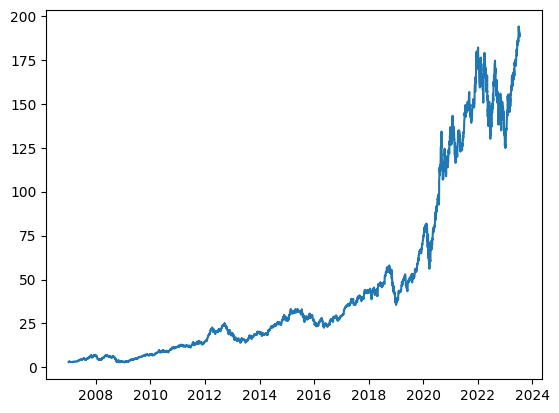

In [ ]:
plt.plot(newdf)

# 2. Data Visualization

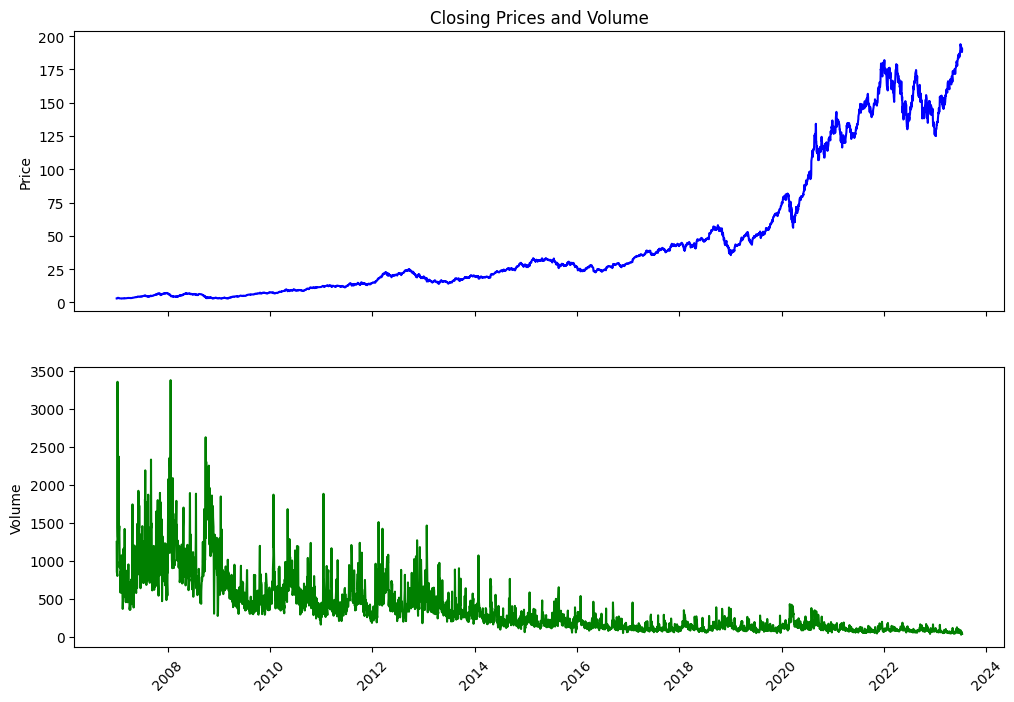

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

ax1.plot(df['time'], df['close'], label='Closing Price', color='blue')
ax1.set_ylabel('Price')
ax1.set_title('Closing Prices and Volume')

ax2.plot(df['time'], df['volume_mln'], label='Volume', color='green')
ax2.set_ylabel('Volume')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


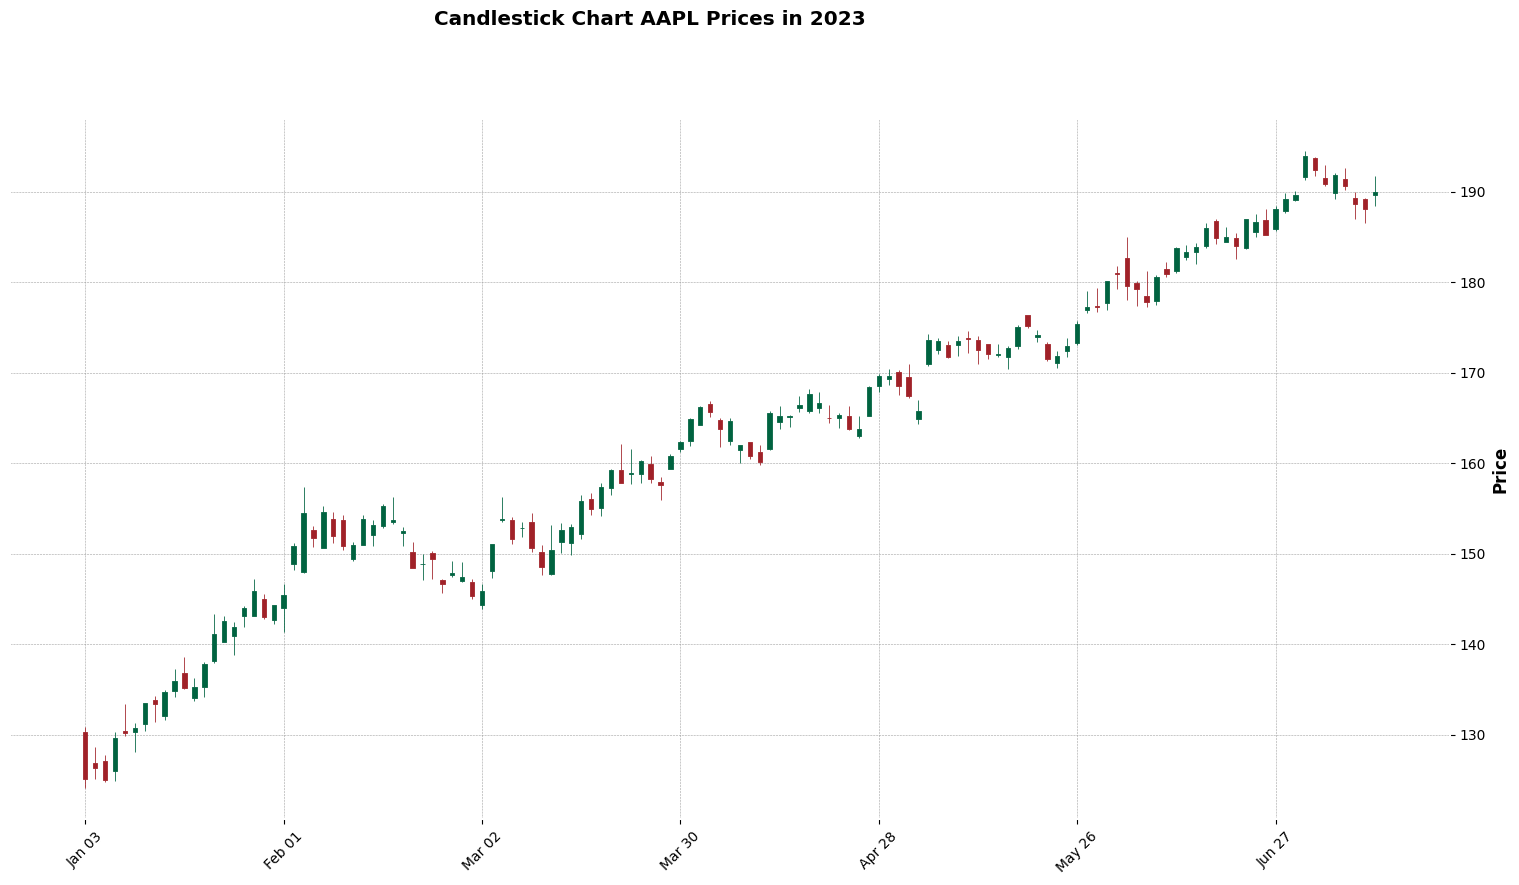

In [ ]:
import mplfinance as mpf

ohlc_data = df[['time', 'open', 'high', 'low', 'close']]
ohlc_data.set_index('time', inplace=True)
ohlc_data = ohlc_data['2023-01-01':]
mpf.plot(ohlc_data, type='candle', style='charles', title='Candlestick Chart AAPL Prices in 2023', figsize=(20, 10))


In [ ]:
monthdf = df.set_index('time')

end_of_month_data = monthdf.resample('M').last()
end_of_month_data

,volume_mln,vwap,open,close,high,low,transactions
time,,,,,,,
2007-01-31,855.021160,3.0372,3.0307,3.0618,3.0714,3.0125,137163
2007-02-28,920.066476,3.0270,3.0196,3.0218,3.0571,2.9643,157787
2007-03-31,600.907804,3.3406,3.3671,3.3182,3.3814,3.3125,95472
2007-04-30,617.447208,3.5840,3.5746,3.5643,3.6071,3.5596,92361
2007-05-31,1300.784268,4.3134,4.2882,4.3283,4.3632,4.2693,205354
...,...,...,...,...,...,...,...
2023-03-31,68.749792,164.0421,162.4400,164.9000,165.0000,161.9100,574409
2023-04-30,55.275851,168.9479,168.4900,169.6800,169.8500,167.8801,527763
2023-05-31,99.625288,177.9376,177.3250,177.2500,179.3500,176.7600,669221


In [ ]:
end_of_y = monthdf.resample('Y').last()
end_of_y

,volume_mln,vwap,open,close,high,low,transactions
time,,,,,,,
2007-12-31,539.331576,7.1155,7.1250,7.0743,7.1607,7.0625,93841
2008-12-31,608.041364,3.0943,3.0704,3.0482,3.1336,3.0479,111427
2009-12-31,352.380532,7.5596,7.6118,7.5261,7.6196,7.5200,62344
2010-12-31,193.655308,11.5014,11.5339,11.5200,11.5529,11.4754,36031
2011-12-31,179.774840,14.4700,14.4111,14.4643,14.5100,14.4104,34884
2012-12-31,659.491140,18.7993,18.2332,19.0062,19.1214,18.1786,127739
2013-12-31,223.277488,19.9894,19.7918,20.0364,20.0457,19.7857,74221
2014-12-31,165.611996,27.8396,28.2050,27.5950,28.2825,27.5525,199310
2015-12-31,163.409264,26.4070,26.7525,26.3150,26.7575,26.2050,217791


# 3. Statistical Analysis


In [ ]:
df.describe()

,volume_mln,vwap,open,close,high,low,transactions
count,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03
mean,366.292450,46.391382,46.362788,46.396058,46.881127,45.865790,2.709318e+05
std,372.479281,50.277557,50.235593,50.293482,50.843874,49.680104,2.510859e+05
min,24.222338,2.841000,2.835400,2.792900,2.928600,2.792900,3.048700e+04
25%,106.749696,11.936200,11.955700,11.947150,12.028400,11.853600,1.128150e+05
50%,213.646276,25.885200,25.775000,25.825000,26.262800,25.680000,1.782460e+05
75%,496.532070,52.154150,52.263750,52.231250,52.626250,51.796250,3.259555e+05
max,3373.042176,193.102000,193.780000,193.970000,194.480000,191.760000,2.966979e+06


In [ ]:
newdf1 = df.copy()
newdf1['year'] = monthdf.index.year

av_by_year = newdf1.groupby('year')['close'].mean()
av_by_year

year
2007      4.581222
2008      5.070867
2009      5.243364
2010      9.280176
2011     13.000154
2012     20.573207
2013     16.879816
2014     23.066142
2015     30.009967
2016     26.151002
2017     37.637764
2018     47.263357
2019     52.063983
2020     95.346759
2021    140.989325
2022    154.835060
2023    162.474999
Name: close, dtype: float64

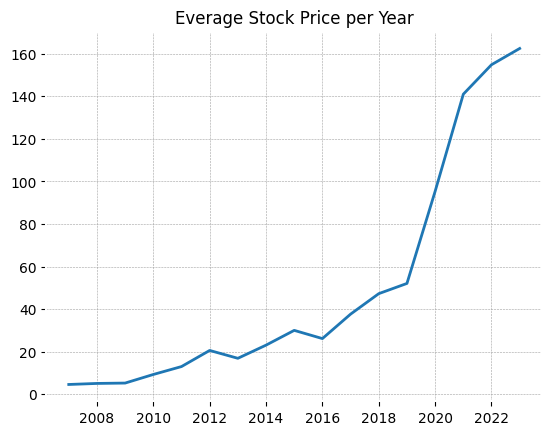

In [ ]:
plt.plot(av_by_year)
plt.title('Everage Stock Price per Year')
plt.show()

In [ ]:
rolling_mean = newdf.rolling(window=100).mean()
print("Rolling Mean:", rolling_mean)

Rolling Mean:                           close
time                           
2007-01-03 05:00:00         NaN
2007-01-04 05:00:00         NaN
2007-01-05 05:00:00         NaN
2007-01-08 05:00:00         NaN
2007-01-09 05:00:00         NaN
...                         ...
2023-07-06 04:00:00  167.513450
2023-07-07 04:00:00  167.910150
2023-07-10 04:00:00  168.257750
2023-07-11 04:00:00  168.606550
2023-07-12 04:00:00  168.953349

[4159 rows x 1 columns]


In [ ]:
dates = pd.to_datetime(df['time'])

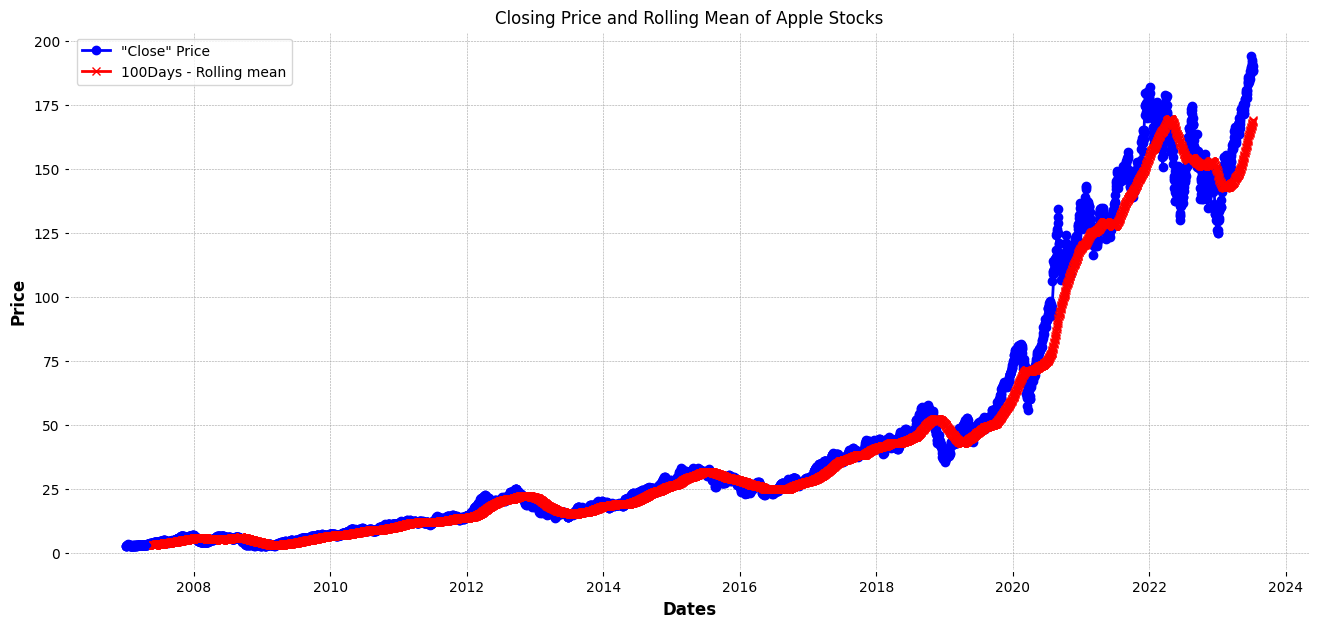

In [ ]:

plt.figure(figsize=(16, 7))
plt.plot(dates, df['close'], label='"Close" Price', color='blue', marker='o')

plt.plot(dates, rolling_mean, label='100Days - Rolling mean', color='red', marker='x')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title('Closing Price and Rolling Mean of Apple Stocks')
plt.legend()
plt.show()

# 4. Hypothesis Testing



In [ ]:
d19 = pd.to_datetime('2020-01-01')
d20 = pd.to_datetime('2021-01-01')
d21 = pd.to_datetime('2022-01-01')
d22 = pd.to_datetime('2023-01-01')

group1 = df[(d19 < df['time']) & (df['time'] < d20)]['close']
group2 = df[(d20 < df['time']) & (df['time'] < d21)]['close']
group3 = df[(d21 < df['time']) & (df['time'] < d22)]['close']

t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-statistic 2020 and 2021:", round(t_statistic,3))
print("P-value 2020 and 2021:", round(p_value,3))

t_statistic, p_value = stats.ttest_ind(group2, group3)
print("T-statistic 2021 and 2022:", round(t_statistic,3))
print("P-value 2021 and 2022:", round(p_value,3))




T-statistic 2020 and 2021: -27.589
P-value 2020 and 2021: 0.0
T-statistic 2021 and 2022: -11.184
P-value 2021 and 2022: 0.0


In [ ]:
group1 = group1.reset_index(drop=True)
group2 = group2.reset_index(drop=True)
group3 = group3.reset_index(drop=True)


<function matplotlib.pyplot.show(close=None, block=None)>

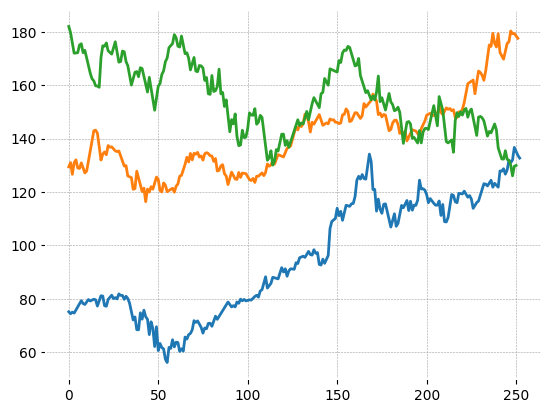

In [ ]:
plt.plot(group1)
plt.plot(group2)
plt.plot(group3)
plt.show

P-value < 0.05, there is a significant difference between of the two groups

In [ ]:
return_stock = (df['close'] - df['open'])
return_stock

0      -0.0892
1       0.0575
2      -0.0257
3      -0.0175
4       0.2186
         ...  
4154    1.9700
4155   -0.7300
4156   -0.6500
4157   -1.0800
4158    0.3299
Length: 4159, dtype: float64

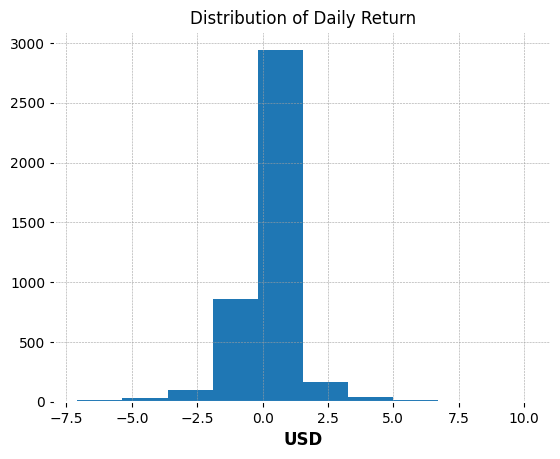

In [ ]:
plt.hist(return_stock, bins=10)
plt.title('Distribution of Daily Return')
plt.xlabel('USD')
plt.show()

In [ ]:
t, p = stats.shapiro(return_stock)
print(f'Shapiro-Wilk Test:')
print(f'Test Statistic: {t}')
print(f'P-value: {p}')

Shapiro-Wilk Test:
Test Statistic: 0.723599910736084
P-value: 0.0


The Shapiro-Wilk test indicates that the data significantly deviates from a normal distribution.

# 5. Advanced Statistical Techniques (Bonus)
   - Signal Processing using SciPy
   - Statistical Functions in NumPy

In [ ]:
df['2weeksmean'] = df['close'].rolling(window=14).mean()
df4 = df.dropna()
corr = np.corrcoef(df4['2weeksmean'], df4['volume_mln'])[0, 1]

print(f'Correlation: {corr}')


Correlation: -0.5204023556016996


The correlation between rolling mean and trade volume is negative and weak

# 6. Summary and Insights, Reflection

Apple stock is a good investment. The stock has been on an upward trend over the entire period of observation. We conducted a number of statistical analysis methods and came to the conclusion that the daily income from the growth in stock price does not correspond to the normal distribution, and the closing price movements in 2022, 2021, 2020 do not correlate with each other